In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock=pd.read_csv('../input/stock-predict/GOOG.csv',index_col='date')
stock

,symbol,close,high,low,open,volume
date,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.470,713.1200,716.48,1306065
2016-06-15 00:00:00+00:00,GOOG,718.92,722.980,717.3100,719.00,1214517
2016-06-16 00:00:00+00:00,GOOG,710.36,716.650,703.2600,714.91,1982471
2016-06-17 00:00:00+00:00,GOOG,691.72,708.820,688.4515,708.65,3402357
2016-06-20 00:00:00+00:00,GOOG,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337


In [3]:
stock=stock.iloc[:,1:]
stock

,close,high,low,open,volume
date,,,,,
2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337


In [4]:
stock.isna().any()

close     False
high      False
low       False
open      False
volume    False
dtype: bool

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
 1   high    1258 non-null   float64
 2   low     1258 non-null   float64
 3   open    1258 non-null   float64
 4   volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0+ KB


In [6]:
d=stock["close"]
i=stock.iloc[:,1:5]
i

,high,low,open,volume
date,,,,
2016-06-14 00:00:00+00:00,722.470,713.1200,716.48,1306065
2016-06-15 00:00:00+00:00,722.980,717.3100,719.00,1214517
2016-06-16 00:00:00+00:00,716.650,703.2600,714.91,1982471
2016-06-17 00:00:00+00:00,708.820,688.4515,708.65,3402357
2016-06-20 00:00:00+00:00,702.480,693.4100,698.77,2082538
...,...,...,...,...
2021-06-07 00:00:00+00:00,2468.000,2441.0725,2451.32,1192453
2021-06-08 00:00:00+00:00,2494.495,2468.2400,2479.90,1253253
2021-06-09 00:00:00+00:00,2505.000,2487.3300,2499.50,1006337


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(i,d,test_size=.15,random_state=0)
x_train

,high,low,open,volume
date,,,,
2019-01-04 00:00:00+00:00,1070.840,1027.42,1032.59,2093894
2019-10-07 00:00:00+00:00,1218.200,1203.75,1204.40,867149
2020-10-23 00:00:00+00:00,1642.360,1620.51,1626.07,1375844
2017-09-06 00:00:00+00:00,930.915,919.27,930.15,1468808
2021-03-04 00:00:00+00:00,2089.240,2020.27,2023.37,2118006
...,...,...,...,...
2019-06-26 00:00:00+00:00,1092.970,1072.24,1086.50,1810869
2019-10-08 00:00:00+00:00,1206.080,1189.01,1197.59,1141784
2021-04-14 00:00:00+00:00,2277.990,2249.19,2275.16,1010967


In [8]:
x_test

,high,low,open,volume
date,,,,
2016-06-21 00:00:00+00:00,702.7700,692.01,698.40,1465634
2018-05-31 00:00:00+00:00,1097.1900,1067.56,1067.56,3088305
2016-08-26 00:00:00+00:00,776.0799,765.85,769.00,1166681
2020-05-13 00:00:00+00:00,1385.4800,1328.40,1377.05,1812585
2017-03-10 00:00:00+00:00,844.9100,839.50,843.28,1704024
...,...,...,...,...
2018-01-10 00:00:00+00:00,1104.6000,1096.11,1097.10,1038917
2019-03-08 00:00:00+00:00,1147.0800,1123.30,1126.73,1212489
2017-05-17 00:00:00+00:00,939.3330,918.14,935.67,2323389


Text(0, 0.5, 'Opening values')

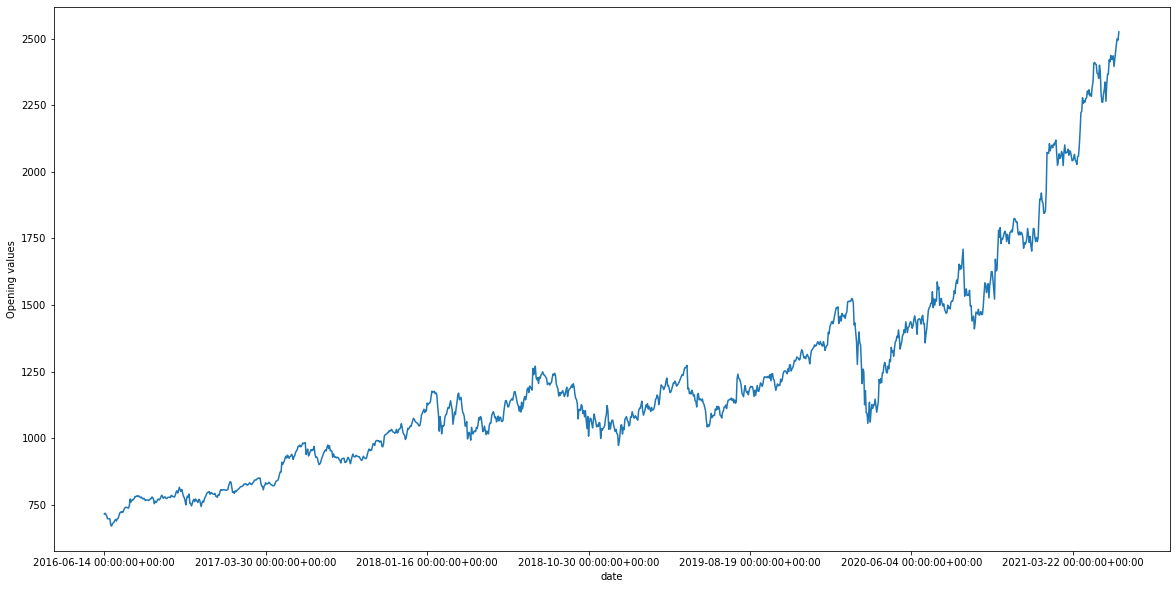

In [9]:
stock["open"].plot(figsize=(20,10))
plt.ylabel("Opening values")

Text(0, 0.5, 'Closing values')

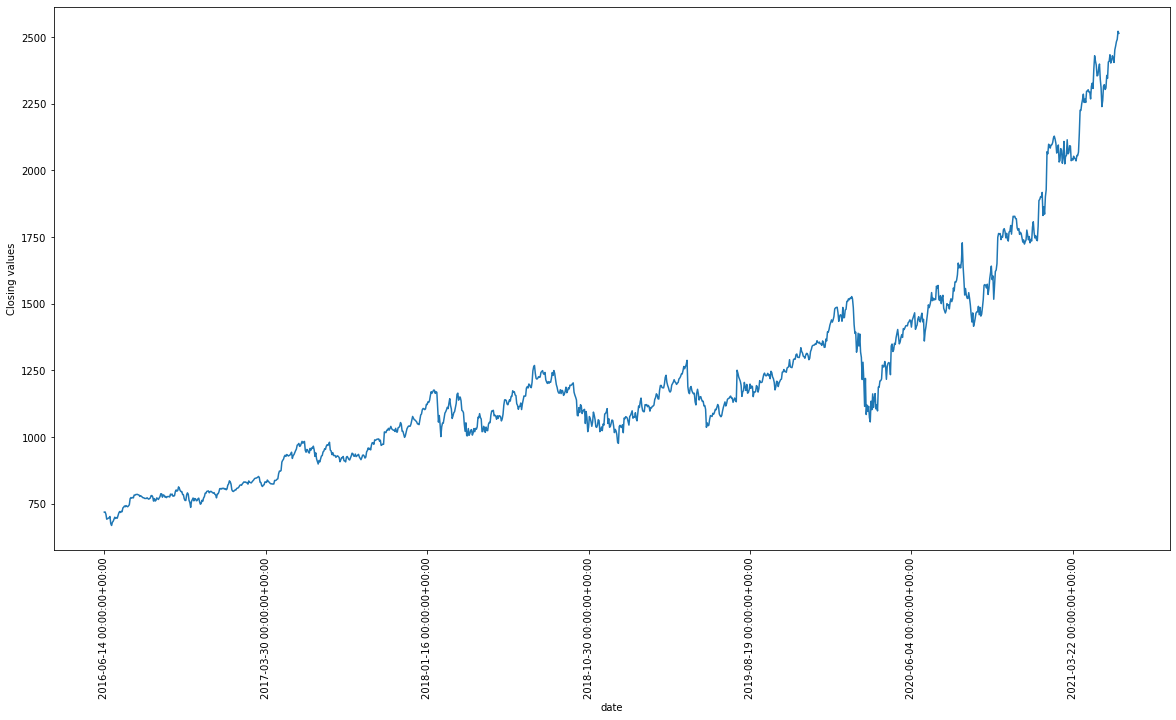

In [10]:
stock["close"].plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.ylabel("Closing values")

In [11]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_train,y_train)
slope=lnr.coef_
inter=lnr.intercept_
print(slope)

[ 7.57815670e-01  7.82484896e-01 -5.40657196e-01 -3.32402016e-07]


In [12]:
predicted_y=lnr.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean absolute error",mean_absolute_error(y_test,predicted_y))
print("Mean squared error",mean_squared_error(y_test,predicted_y))
print("Root Mean squared error",np.sqrt(mean_squared_error(y_test,predicted_y)))

Mean absolute error 5.20259577183527
Mean squared error 53.423469583414125
Root Mean squared error 7.309136035361096


In [14]:
lt=[]
for v in i.columns:
    print("Enter",v)
    record=float(input())
    lt.append(record)
user_v=np.array(lt)
user_v=user_v.reshape(1,-1)

Enter high


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [ ]:
print("Closing price",lnr.predict(user_v))

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
dataplot=sns.heatmap(stock.corr())
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predicted_y,c='crimson')
plt.xlabel('True values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(predicted_y,c='red')
plt.ylabel('Y values',fontsize=5)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train_norm=mms.fit_transform(x_train)
x_test_norm=mms.fit_transform(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted_y)

In [ ]:
lnr=LinearRegression()
lnr.fit(x_train_norm,y_train)
predict_y=lnr.predict(x_test_norm)
predict_y

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predict_y)